In [1]:
!pip install fredapi

In [2]:
from fredapi import Fred

In [3]:
fred = Fred(api_key='a5a97cac4db0404123d6c8bbb21ae701')

In [10]:
data1 = fred.get_series('PAYEMS')

In [15]:
type(data1)

pandas.core.series.Series

In [18]:
data1 = fred.get_series('PAYEMS', '6/1/2022')

In [19]:
data1

2022-06-01    152412.0
2022-07-01    152980.0
2022-08-01    153332.0
2022-09-01    153682.0
2022-10-01    154006.0
2022-11-01    154296.0
2022-12-01    154535.0
2023-01-01    155007.0
2023-02-01    155255.0
2023-03-01    155472.0
2023-04-01    155689.0
2023-05-01    155970.0
2023-06-01    156075.0
2023-07-01    156311.0
2023-08-01    156476.0
2023-09-01    156738.0
2023-10-01    156843.0
2023-11-01    157016.0
2023-12-01    157232.0
dtype: float64

<Axes: >

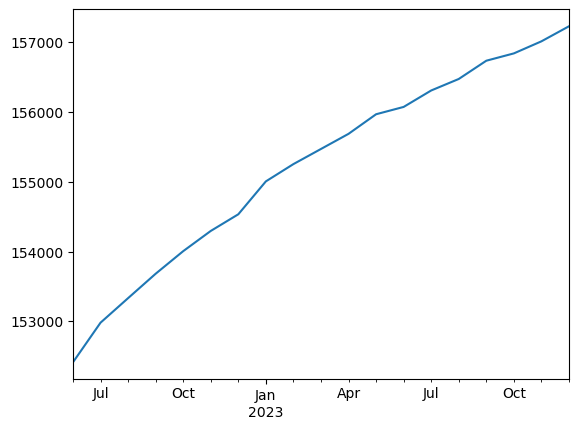

In [20]:
data1.plot()

In [21]:
data2 = fred.get_series('CPIAUCSL')

In [22]:
data2 = fred.get_series('CPIAUCSL', '6/1/2022')

<Axes: >

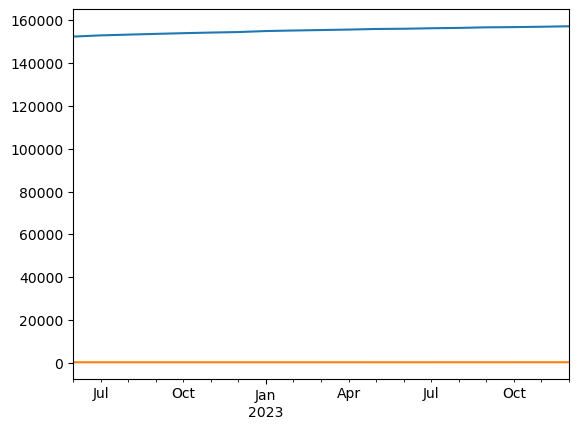

In [23]:
data1.plot()
data2.plot()

In [24]:
df1 = data1.to_frame(name="PAYEMS")
df2 = data2.to_frame(name='CPIAUCSL')

In [25]:
import pandas as pd
df_merged = pd.concat([df1, df2], axis=1)

In [26]:
df_merged

,PAYEMS,CPIAUCSL
2022-06-01,152412.0,294.728
2022-07-01,152980.0,294.628
2022-08-01,153332.0,295.320
2022-09-01,153682.0,296.539
2022-10-01,154006.0,297.987
2022-11-01,154296.0,298.598
2022-12-01,154535.0,298.990
2023-01-01,155007.0,300.536
2023-02-01,155255.0,301.648
2023-03-01,155472.0,301.808


In [27]:
import matplotlib
import matplotlib.pyplot as plt

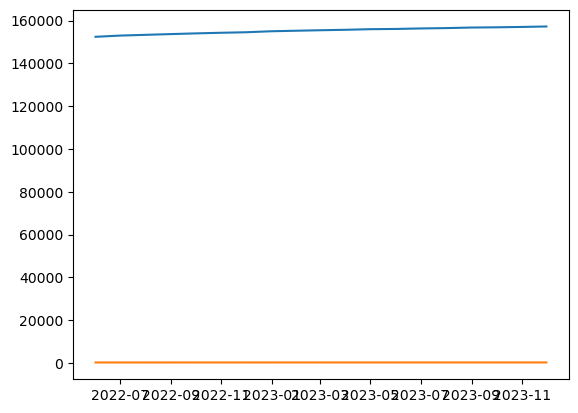

In [28]:
plt.plot(df_merged.index, df_merged['PAYEMS'])
plt.plot(df_merged.index, df_merged['CPIAUCSL'])

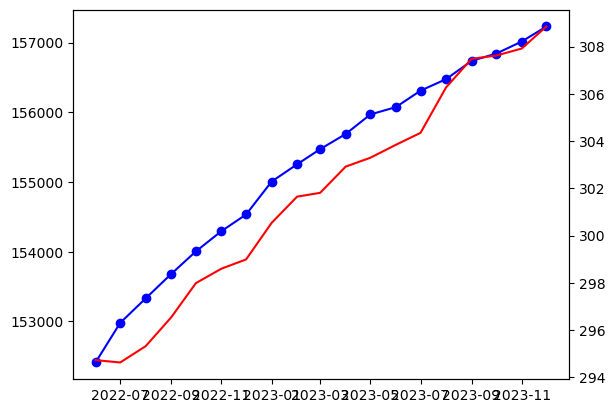

In [29]:
fig,ax = plt.subplots()
ax.plot(df_merged.index, 
df_merged['PAYEMS'],color="blue",marker="o")
ax2=ax.twinx()
ax2.plot(df_merged.index, 
df_merged['CPIAUCSL'],color="red")
fig.savefig('折線圖.jpg',format='jpeg')

In [30]:
df_merged.corr()

,PAYEMS,CPIAUCSL
PAYEMS,1.000000,0.987902
CPIAUCSL,0.987902,1.000000


<Axes: >

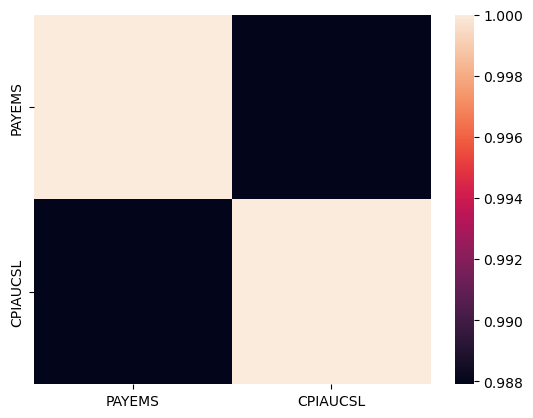

In [31]:
import seaborn as sns
sns.heatmap(df_merged.corr())

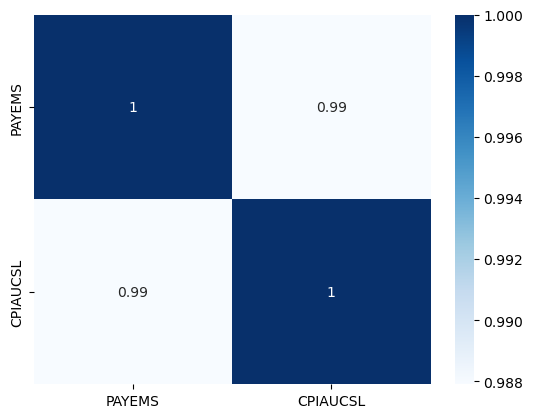

In [32]:
svm = sns.heatmap(df_merged.corr(), cmap="Blues", 
annot=True)
figure = svm.get_figure()    
figure.savefig('相關係數.png', dpi=400)